# **Vertical Profiles of Horizontal and Vertical Wind Observations from SWEX LiDARs**
### This notebook performs the following task(s):
> - #### Analyzes and plots vertical profiles of horizontal and vertical winds collected from LiDAR instruments deployed during the SWEX field campaign, which occurred across Santa Barbara County (California) from April 1-May 15, 2022.

## **Import packages**
### Links to documentation for packages:
> - #### [pathlib](https://docs.python.org/3/library/pathlib.html) | [numpy](https://numpy.org/doc/1.25/) | [pandas](https://pandas.pydata.org/docs/) | [matplotlib](https://matplotlib.org/3.7.2/index.html) |
> - #### Documentation for packages linked above should mostly correspond to the most stable versions, which may not be the exact versions used when creating this notebook.
> - #### Comments are also included in the actual code cells. Commented links above certain pieces of code are provided to help show where some lines were copied from. It is possible that there may still be snippets of code here that were simply grabbed off the internet, from places like StackOverflow, without any atribution.

In [1]:
#----------------------------------------------------------------------------------------------------------------------
#Import entire packages
import pathlib
import numpy as np
import pandas as pd

#matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.font_manager as mplf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#function notebook
%run ./functions_swex_iop_10.ipynb
#----------------------------------------------------------------------------------------------------------------------

ERROR 1: PROJ: proj_create_from_database: Open of /home/sbarc/students/mariandob/mambaforge/envs/swex/share/proj failed


## **Define variables that point to relative paths for relevant data**
### **Data Information:**

> - #### **San Jose State University Gaviota Fire Station #38 LiDAR**
>> - #### Institution: San Jose State University
>> - #### **Horizontal Winds**: Temporal Resolution: ? minutes | Spatial Resolution: ? | File Format: csv
>> - #### **Vertical Winds**: Temporal Resolution: ? minutes | Spatial Resolution: ? | File Format: hpl
>> - #### Time Zone of All Files: UTC (times defined in individual file name)
>> - #### Contact: [Dr. Craig Clements](https://scholar.google.com/citations?hl=en&user=3ENpv4sAAAAJ)
>> - #### Notes: Insturment was placed in a stationary position at [Santa Barbara County Fire Station #38]() during SWEX campaign.
> - #### **University of Virginia Wind Observatory on Wheels (UWOW) Lidar**
>> - #### Institution: University of Viriginia
>> - #### **Horizontal Winds**: Temporal Resolution: 5 minutes | Spatial Resolution: ? | File Format: csv
>> - #### **Vertical Winds**: Temporal Resolution: ? minutes | Spatial Resolution: ? | File Format: hpl
>> - #### Time Zone of All Files: UTC (times defined in individual file name)
>> - #### Contact: [Dr. Stephan De Wekker](https://scholar.google.com/citations?user=fFmGhMIAAAAJ)
>> - #### Notes: Insturment was placed in a stationary position at [Montecito Fire Department Station #2](https://www.google.com/search?q=montecito%20fire%20department&oq=montecito+fire+dea&aqs=chrome.1.69i57j0i22i30l5j0i390l2.6224j0j7&sourceid=chrome&ie=UTF-8&tbs=lf:1,lf_ui:2&tbm=lcl&rflfq=1&num=10&rldimm=5139842384965028754&lqi=Chltb250ZWNpdG8gZmlyZSBkZXBhcnRtZW50SMrUxtblgICACForEAEQAhgAGAEYAiIZbW9udGVjaXRvIGZpcmUgZGVwYXJ0bWVudCoECAIQAZIBDGZpcmVfc3RhdGlvbuABAA&ved=2ahUKEwiBn5Wzu6b6AhV4K0QIHWwGAfQQvS56BAhSEAE&sa=X&rlst=f#rlfi=hd:;si:5139842384965028754,l,Chltb250ZWNpdG8gZmlyZSBkZXBhcnRtZW50SMrUxtblgICACForEAEQAhgAGAEYAiIZbW9udGVjaXRvIGZpcmUgZGVwYXJ0bWVudCoECAIQAZIBDGZpcmVfc3RhdGlvbuABAA;mv:[[34.4404773,-119.6314641],[34.4397996,-119.66111210000001]];tbs:lrf:!1m4!1u2!2m2!2m1!1e1!2m1!1e2!3sIAE,lf:1,lf_ui:2) during SWEX IOP #10. Google Maps hyperlink is simply an approximate, and NOT precise, location of the instrument.
> - #### **University of Notre Dame (UND) Santa Barbara Botanitc Garden Lidar**
>> - #### Institution: University of Notre Dam
>> - #### **Horizontal Winds**: Temporal Resolution: ~5-15 minutes | Spatial Resolution: ? | File Format: hpl
>> - #### **Vertical Winds**: Temporal Resolution: ? minutes | Spatial Resolution: ? | File Format: hpl
>> - #### Time Zone of All Files: UTC (times defined in individual file name)
>> - #### Contact: [Harindra Joseph Fernando](https://engineering.nd.edu/faculty/harinda-fernando/)
>> - #### Notes: Insturment was placed in a stationary position at the [Santa Barbara Botanic Garden](https://www.google.com/maps/place/Santa+Barbara+Botanic+Garden/@34.4565481,-119.7122141,17z/data=!3m1!4b1!4m5!3m4!1s0x80e914b02322f4f3:0xd90c53e43be9a7e3!8m2!3d34.4565481!4d-119.7100254) for the duration of the entire SWEX campaign. Google Maps hyperlink is simply an approximate, and NOT precise, location of the instrument.
> - #### **National Center for Atmospheric Research (NCAR) Earth Observing Laboratory (EOL) Integrated Sounding System (ISS) Lidar**
>> - #### Institution: National Center for Atmospheric Research/Earth Observing Laboratory
>> - #### **Horizontal Winds**: Temporal Resolution: ~10 minutes | Spatial Resolution: ? | File Format: netcdf
>> - #### **Vertical Winds**: Temporal Resolution: ? minutes | Spatial Resolution: ? | File Format: netcdf
>> - #### Time Zone of All Files: UTC
>> - #### Contact: EOL Data Support (eol-datahelp@ucar.edu)
>> - #### Notes: [Link](https://data.eol.ucar.edu/master_lists/generated/swex/) to NCAR/EOL SWEX Datasets webpage and [Link](https://www.eol.ucar.edu/content/iss-operations-swex) to instruments included on Integrated Sounding System (ISS) sites.

In [2]:
#----------------------------------------------------------------------------------------------------------------------
#Define paths to data directories

#SJSU: Gaviota Fire Station #38 (gfs38)
path_to_gfs38_xy_lidar_iop_10_files  = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_gfs38/v1_processed_wind_profile_hpl/').glob('Processed_*.hpl'))
path_to_gfs38_z_lidar_iop_10_files   = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_gfs38/v1_stare_hpl/').glob('Stare_*.hpl'))

#NCAR: Santa Barbara Fire Department Headquarters (sbfdhq)
path_to_sbfdhq_xy_lidar_iop_10_files = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbfdhq/v2_vad_nc/').glob('VAD_*.nc'))
path_to_sbfdhq_z_lidar_iop_10_files  = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbfdhq/v2_vad_nc/').glob('VAD_*.nc'))

#UND: Santa Barbara Botanic Garden LiDAR (sbbg)
path_to_sbbg_xy_lidar_iop_10_files   = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbbg/v0_processed_wind_profile_hpl/').glob('Processed_Wind_Profile_116_*.hpl'))
path_to_sbbg_z_lidar_iop_10_files    = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbbg/v0_stare_hpl/').glob('Stare_116_*.hpl'))

#UWOW: Montecito Fire Station #2 LiDAR (mfs2; IOP #10 only)
path_to_mfs2_xy_lidar_iop_10_files   = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_mfs2/v0_vad_csv/').glob('UWOW_*.csv'))
path_to_mfs2_z_lidar_iop_10_files    = sorted(pathlib.Path('./data_swex/observations_ground/iop_10_lidar/iop_10_lidar_mfs2/v0_stare_hpl/').glob('Stare_*.hpl'))
#----------------------------------------------------------------------------------------------------------------------
#Display a few files to make sure we have them

print('-------------------------')
print('Horizontal LiDAR Files')
print('-------------------------')

display(path_to_gfs38_xy_lidar_iop_10_files[0])
display(path_to_sbfdhq_xy_lidar_iop_10_files[0])
display(path_to_sbbg_xy_lidar_iop_10_files[0])
display(path_to_mfs2_xy_lidar_iop_10_files[0])

print(' ')

print('-------------------------')
print('Vertical LiDAR Files')
print('-------------------------')
display(path_to_gfs38_z_lidar_iop_10_files[0])
display(path_to_sbfdhq_z_lidar_iop_10_files[0])
display(path_to_sbbg_z_lidar_iop_10_files[0])
display(path_to_mfs2_z_lidar_iop_10_files[0])
#----------------------------------------------------------------------------------------------------------------------

-------------------------
Horizontal LiDAR Files
-------------------------


PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_gfs38/v1_processed_wind_profile_hpl/Processed_Wind_Profile_19_20220511_235148.hpl')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbfdhq/v2_vad_nc/VAD_42_20220512.nc')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbbg/v0_processed_wind_profile_hpl/Processed_Wind_Profile_116_20220511_235117.hpl')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_mfs2/v0_vad_csv/UWOW_VAD_20220512_150343.csv')

 
-------------------------
Vertical LiDAR Files
-------------------------


PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_gfs38/v1_stare_hpl/Stare_19_20220512_17.hpl')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbfdhq/v2_vad_nc/VAD_42_20220512.nc')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_sbbg/v0_stare_hpl/Stare_116_20220512_00.hpl')

PosixPath('data_swex/observations_ground/iop_10_lidar/iop_10_lidar_mfs2/v0_stare_hpl/Stare_122_20220512_15.hpl')

## **Run helper function to process each institution's LiDAR derived vertical profiles of horizontal and vertical winds**
### Notes
> - #### See in-line comments for additional code comments.

In [3]:
#----------------------------------------------------------------------------------------------------------------------
#Run our helper LiDAR functions which process each instrument's data into xarray Datasets

#XY wind lidar processing
xy_gfs38_ds  = xy_lidar_wind_profiles_ds(glob_paths=path_to_gfs38_xy_lidar_iop_10_files,   institution_str='sjsu')
xy_sbfdhq_ds = xy_lidar_wind_profiles_ds(glob_paths=path_to_sbfdhq_xy_lidar_iop_10_files,  institution_str='ncar')
xy_sbbg_ds   = xy_lidar_wind_profiles_ds(glob_paths=path_to_sbbg_xy_lidar_iop_10_files,    institution_str='und')
xy_mfs2_ds   = xy_lidar_wind_profiles_ds(glob_paths=path_to_mfs2_xy_lidar_iop_10_files,    institution_str='uwow_vad')

#Z wind lidar processing
z_gfs38_ds  = z_lidar_wind_profiles_ds(glob_paths=path_to_gfs38_z_lidar_iop_10_files,  institution_str='sjsu')
z_sbfdhq_ds = z_lidar_wind_profiles_ds(glob_paths=path_to_sbfdhq_z_lidar_iop_10_files, institution_str='ncar')
z_sbbg_ds   = z_lidar_wind_profiles_ds(glob_paths=path_to_sbbg_z_lidar_iop_10_files,   institution_str='und')
z_mfs2_ds   = z_lidar_wind_profiles_ds(glob_paths=path_to_mfs2_z_lidar_iop_10_files,   institution_str='uwow')
#----------------------------------------------------------------------------------------------------------------------

## **Apply any necessary masks to LiDAR xarray Datasets**
### Notes
> - #### See in-line comments for additional code comments.

In [8]:
#----------------------------------------------------------------------------------------------------------------------
#XY LiDAR data masking
xy_gfs38_ds_masked  = xy_gfs38_ds.where(xy_gfs38_ds['xy_wind_speed'] < 30)
xy_sbfdhq_ds_masked = xy_sbfdhq_ds
xy_sbbg_ds_masked   = xy_sbbg_ds
xy_mfs2_ds_masked   = xy_mfs2_ds.where(xy_mfs2_ds['xy_wind_snr'] > 1.01)

z_gfs38_ds_masked  = z_gfs38_ds
z_sbfdhq_ds_masked = z_sbfdhq_ds
z_sbbg_ds_masked   = z_sbbg_ds
z_mfs2_ds_masked   = z_mfs2_ds
#----------------------------------------------------------------------------------------------------------------------

## **Resample LiDAR datasets and create 2D height and time arrays**
### Notes
> - #### This cell uses xarray's "resample" function to temporally average the LiDAR data from each instrument.
> - #### This cell also manually created 2D height and time arrays for each LiDAR, which will be used when plotting.
> - #### See in-line comments for additional code comments.

In [9]:
#----------------------------------------------------------------------------------------------------------------------
#Define resampling time interval as a string
#"30T" = 30-Minutes
resample_interval_str = '15min'

#Resample XY LiDAR data
#We transpose the dataset after resampling because the dimensions get swapped when resampling
xy_gfs38_ds_resampled  = xy_gfs38_ds_masked.resample(time=resample_interval_str).mean().transpose()
xy_sbfdhq_ds_resampled = xy_sbfdhq_ds_masked.resample(time=resample_interval_str).mean().transpose()
xy_sbbg_ds_resampled   = xy_sbbg_ds_masked.resample(time=resample_interval_str).mean().transpose()
xy_mfs2_ds_resampled   = xy_mfs2_ds_masked.resample(time=resample_interval_str).mean().transpose()

#Resample Z LiDAR data
#We transpose the dataset after resampling because the dimensions get swapped when resampling
z_gfs38_ds_resampled  = z_gfs38_ds_masked.resample(time=resample_interval_str).mean().transpose()
z_sbfdhq_ds_resampled = z_sbfdhq_ds_masked.resample(time=resample_interval_str).mean().transpose()
z_sbbg_ds_resampled   = z_sbbg_ds_masked.resample(time=resample_interval_str).mean().transpose()
z_mfs2_ds_resampled   = z_mfs2_ds_masked.resample(time=resample_interval_str).mean().transpose()
#----------------------------------------------------------------------------------------------------------------------
#Define 2D height and time arrays for each instrument for plotting

#XY LiDAR 2D height and time arrays
xy_gfs38_time_2d_resampled,  xy_gfs38_height_2d_resampled  = np.meshgrid(xy_gfs38_ds_resampled.time,  xy_gfs38_ds_resampled.height)
xy_sbfdhq_time_2d_resampled, xy_sbfdhq_height_2d_resampled = np.meshgrid(xy_sbfdhq_ds_resampled.time, xy_sbfdhq_ds_resampled.height)
xy_sbbg_time_2d_resampled,   xy_sbbg_height_2d_resampled   = np.meshgrid(xy_sbbg_ds_resampled.time,   xy_sbbg_ds_resampled.height)
xy_mfs2_time_2d_resampled,   xy_mfs2_height_2d_resampled   = np.meshgrid(xy_mfs2_ds_resampled.time,   xy_mfs2_ds_resampled.height)

#Z LiDAR 2D height and time arrays
z_gfs38_time_2d_resampled,  z_gfs38_height_2d_resampled  = np.meshgrid(z_gfs38_ds_resampled.time,  z_gfs38_ds_resampled.height)
z_sbfdhq_time_2d_resampled, z_sbfdhq_height_2d_resampled = np.meshgrid(z_sbfdhq_ds_resampled.time, z_sbfdhq_ds_resampled.height)
z_sbbg_time_2d_resampled,   z_sbbg_height_2d_resampled   = np.meshgrid(z_sbbg_ds_resampled.time,   z_sbbg_ds_resampled.height)
z_mfs2_time_2d_resampled,   z_mfs2_height_2d_resampled   = np.meshgrid(z_mfs2_ds_resampled.time,   z_mfs2_ds_resampled.height)
#----------------------------------------------------------------------------------------------------------------------

## **Plot XY and Z wind LiDAR data (vertical profiles of horizontal and vertical winds)**
### Notes
> - #### See in-line code comments for any additional relevant informaiton. 

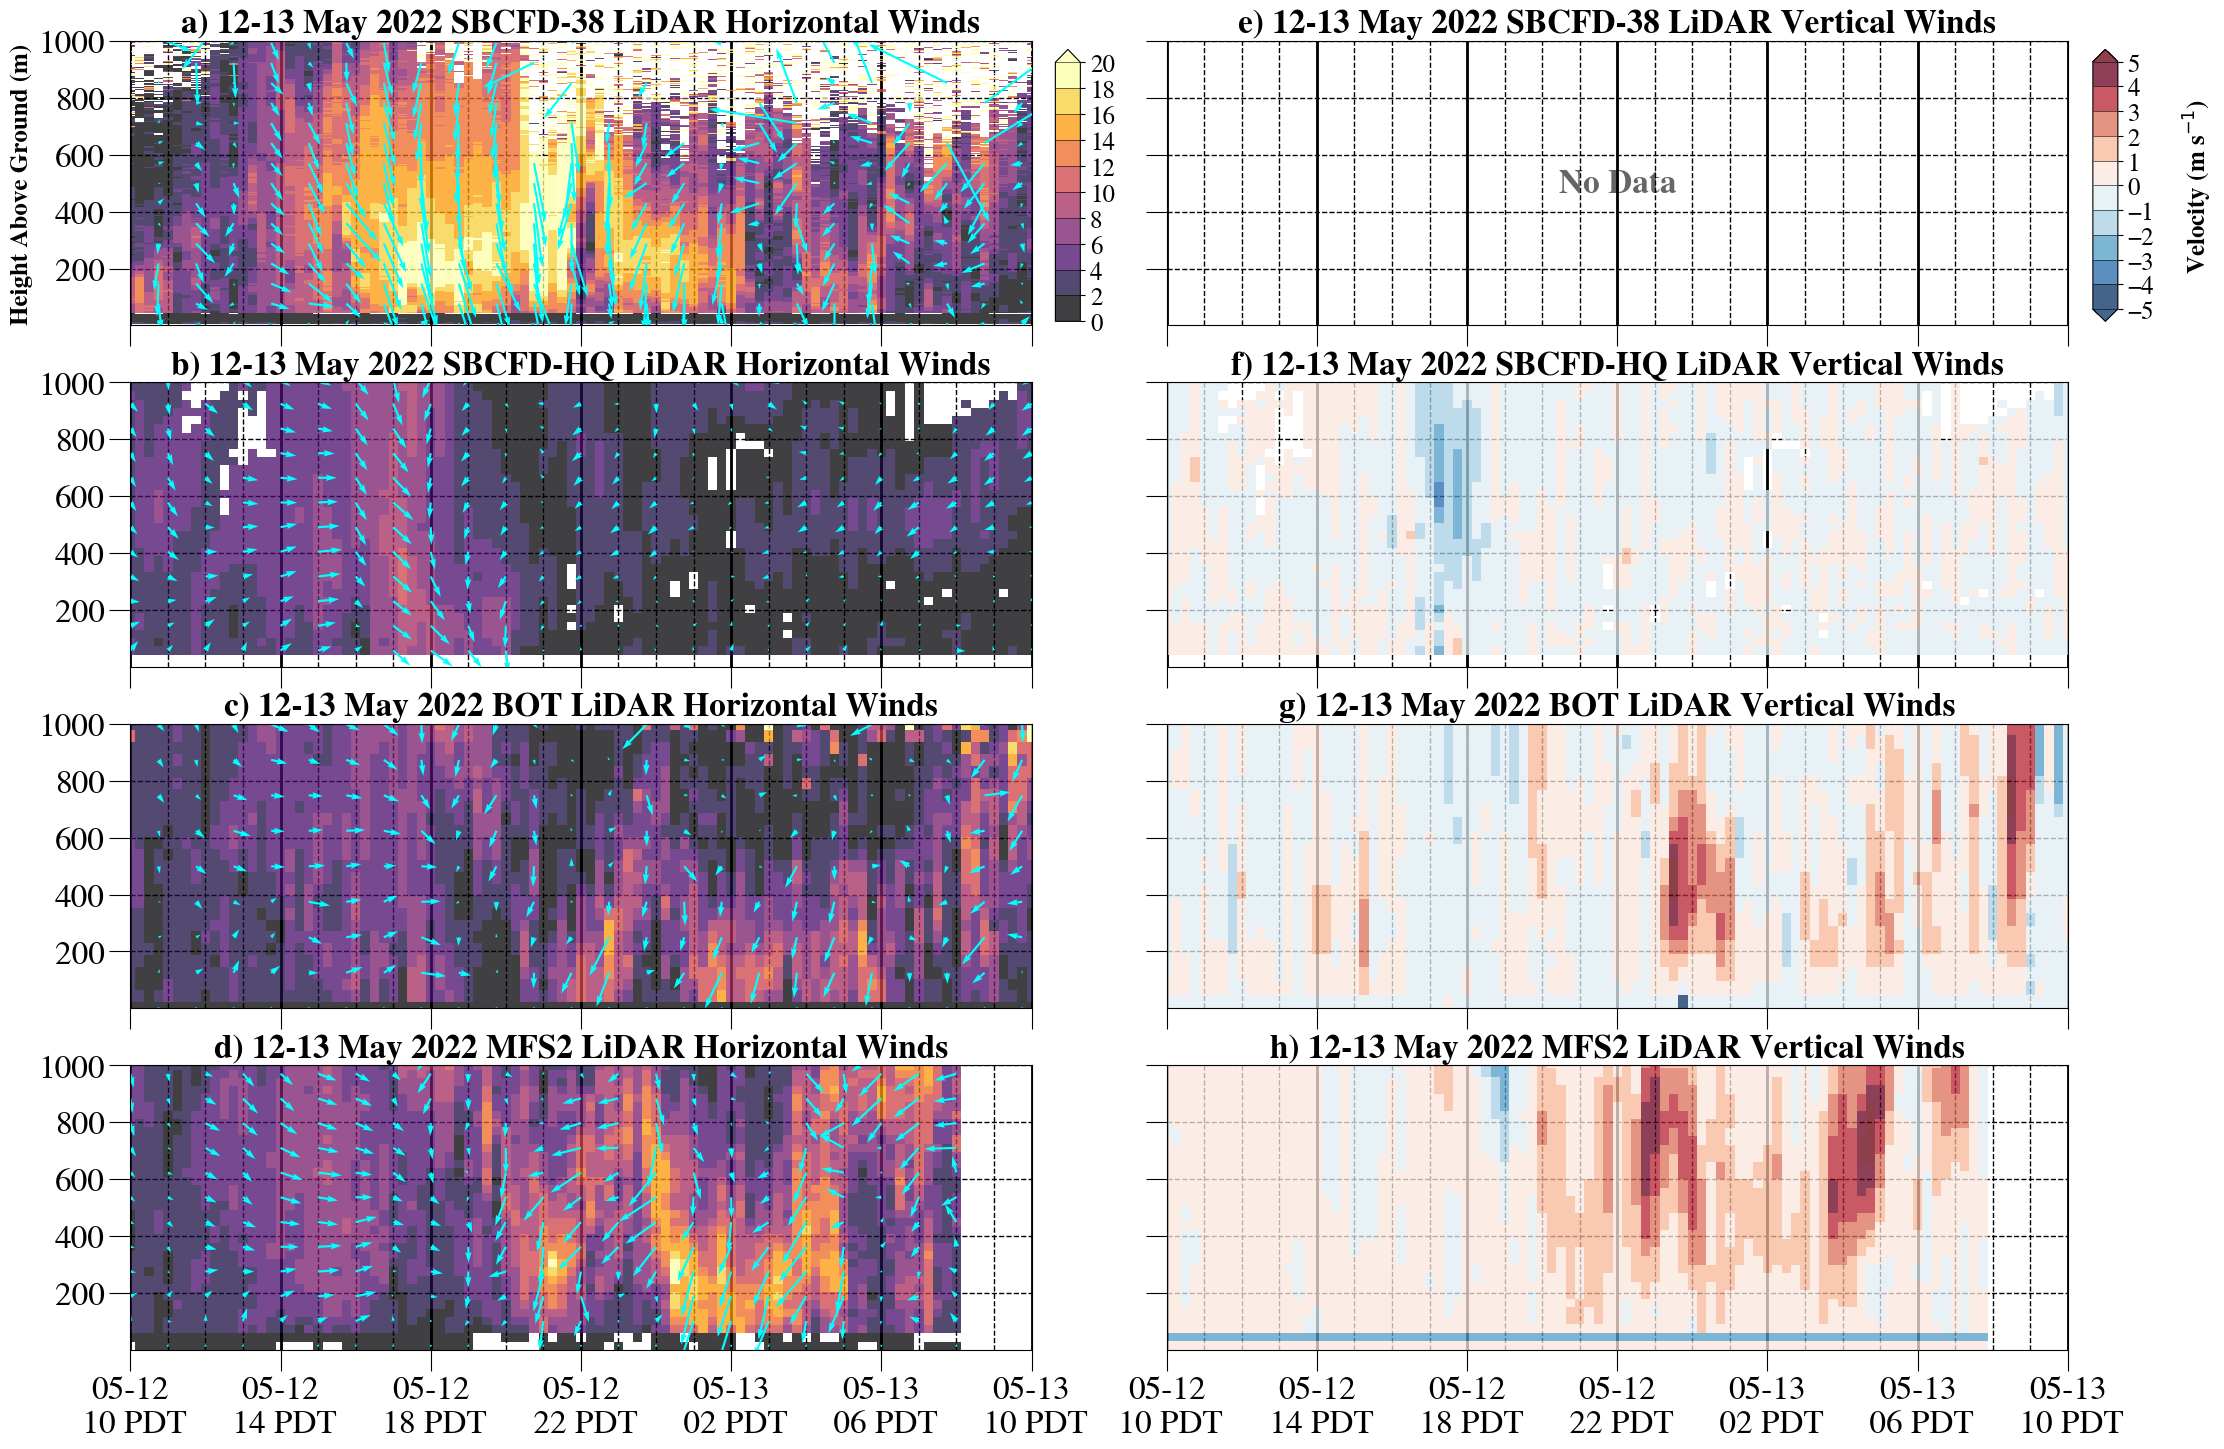

In [24]:
#----------------------------------------------------------------------------------------------------------------------
#Key word arguements for the created figure, line plot timeseries, and scatter plot timeseries
fig_kwargs = dict(nrows=4, ncols=2, sharex='all', figsize=(25,17), gridspec_kw=dict(hspace=0.2, wspace=0.15))

#Define font dictionaries for plotting
fontdict_xtick_labels  = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_ytick_labels  = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_xaxis_labels  = {'fontsize': 24, 'fontweight': 'bold',   'fontname': 'Nimbus Roman'}
fontdict_yaxis_labels  = {'fontsize': 18, 'fontweight': 'bold',   'fontname': 'Nimbus Roman'}
fontdict_title_labels  = {'fontsize': 24, 'fontweight': 'bold',   'fontname': 'Nimbus Roman'}
fontdict_text_color_bar = {'fontsize': 18, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_legend_labels = {'size': 20, 'weight': 'bold', 'family':'Nimbus Roman'}

#Create figure and axis for plotting
fig, axs = plt.subplots(**fig_kwargs)

inset_annotation_str_list = ['a) 12-13 May 2022 SBCFD-38 LiDAR Horizontal Winds', 'e) 12-13 May 2022 SBCFD-38 LiDAR Vertical Winds',
                             'b) 12-13 May 2022 SBCFD-HQ LiDAR Horizontal Winds', 'f) 12-13 May 2022 SBCFD-HQ LiDAR Vertical Winds',
                             'c) 12-13 May 2022 BOT LiDAR Horizontal Winds',      'g) 12-13 May 2022 BOT LiDAR Vertical Winds',
                             'd) 12-13 May 2022 MFS2 LiDAR Horizontal Winds',     'h) 12-13 May 2022 MFS2 LiDAR Vertical Winds']


lidar_times_list      = [xy_gfs38_time_2d_resampled,  z_gfs38_time_2d_resampled,
                         xy_sbfdhq_time_2d_resampled, z_sbfdhq_time_2d_resampled,
                         xy_sbbg_time_2d_resampled,   z_sbbg_time_2d_resampled,
                         xy_mfs2_time_2d_resampled,   z_mfs2_time_2d_resampled,]

lidar_heights_list    = [xy_gfs38_height_2d_resampled,  z_gfs38_height_2d_resampled,
                         xy_sbfdhq_height_2d_resampled, z_sbfdhq_height_2d_resampled,
                         xy_sbbg_height_2d_resampled,   z_sbbg_height_2d_resampled,
                         xy_mfs2_height_2d_resampled,   z_mfs2_height_2d_resampled,]

lidar_wind_speed_list = [xy_gfs38_ds_resampled['xy_wind_speed'],  z_gfs38_ds_resampled['wind_speed_z'],
                         xy_sbfdhq_ds_resampled['xy_wind_speed'], z_sbfdhq_ds_resampled['wind_speed_z'],
                         xy_sbbg_ds_resampled['xy_wind_speed'],   z_sbbg_ds_resampled['wind_speed_z'],
                         xy_mfs2_ds_resampled['xy_wind_speed'],   z_mfs2_ds_resampled['wind_speed_z']]

lidar_wind_u_list     = [xy_gfs38_ds_resampled['xy_wind_u'],  [], 
                         xy_sbfdhq_ds_resampled['xy_wind_u'], [], 
                         xy_sbbg_ds_resampled['xy_wind_u'],   [],
                         xy_mfs2_ds_resampled['xy_wind_u'],   []]

lidar_wind_v_list     = [xy_gfs38_ds_resampled['xy_wind_v'],  [], 
                         xy_sbfdhq_ds_resampled['xy_wind_v'], [], 
                         xy_sbbg_ds_resampled['xy_wind_v'],   [],
                         xy_mfs2_ds_resampled['xy_wind_v'],   []]


barb_density_height_list = [50, [], 
                            3,  [], 
                            3,  [],
                            3,  []]

barb_density_time_list   = [4, [], 
                            4,  [], 
                            4,  [],
                            4,  []]
#----------------------------------------------------------------------------------------------------------------------
#For each axis we have, do the following:
for ax_index, ax in enumerate(axs.flatten()):
    
    #x-axis customizations for last axis
    xticks_utc = pd.date_range(start='2022-05-12 17:00', end='2022-05-13 17:00', freq='1H')
    xticks_pdt = xticks_utc - np.timedelta64(7, 'h')
    xticklabels = [f'{str(xtick_pdt)[5:10]}\n{str(xtick_pdt)[10:13]} PDT' for xtick_pdt in xticks_pdt]
    ax.set_xlim([xticks_utc[0],xticks_utc[-1]])
    ax.set_xticks(xticks_utc[::4])
    ax.set_xticklabels(xticklabels[::4], fontdict=fontdict_xtick_labels)
        
    #y-axis customizations for all axes
    y_min  = 200
    y_max  = 1000
    y_step = 200
    yticks = np.arange(y_min, y_max+y_step, y_step)
    ax.set_yticks(yticks)
    ax.set_ylim([0, y_max])
        
    #Plot a horizontal lines that spans the entire x-axis for each of the y_ticks we have
    for y_tick in yticks:
        ax.axhline(y=y_tick, xmin=0, xmax=1, color='black', linestyle='--', linewidth=1, zorder=1)

    #Plot a vertical line that spands the entire y-axis for every hour
    for xtick_utc in xticks_utc:
        ax.axvline(x=xtick_utc, ymin=0, ymax=1, color='black', linestyle='--', linewidth=1, zorder=1)

    #Make vertical line thicker where hours when we have a xticklabel
    for xtick_utc in xticks_utc[::4]:
        ax.axvline(x=xtick_utc, ymin=0, ymax=1, color='black', linestyle='-', linewidth=2, zorder=1)
    
    #Add title
    ax.set_title(inset_annotation_str_list[ax_index], **fontdict_title_labels)
    
    #Add ticks longer
    ax.tick_params(axis='both', which='major', length=15)
#----------------------------------------------------------------------------------------------------------------------        
    #If the ax index is even, we are plotting XY LiDAR data
    if ax_index % 2 == 0:
    
        #Define colorbar levels and colorbar norms for plotting XY data
        #https://stackoverflow.com/questions/48613920/use-of-extend-in-a-pcolormesh-plot-with-discrete-colorbar
        #https://mycarta.wordpress.com/2012/10/14/the-rainbow-is-deadlong-live-the-rainbow-part-4-cie-lab-heated-body/
        xy_level_min  = 0
        xy_level_max  = 20
        xy_level_step = 2
        xy_levels = np.arange(xy_level_min,xy_level_max+xy_level_step,xy_level_step)
        xy_cmap   = plt.get_cmap('inferno').copy()
        xy_cmap.set_extremes(under='None', over='#ffffb2', bad='None')        
        xy_norm   = mplc.BoundaryNorm(xy_levels, ncolors=xy_cmap.N, clip=False)
        
        #Plot pcolormesh
        xy_pcolormesh = ax.pcolormesh(lidar_times_list[ax_index], 
                                      lidar_heights_list[ax_index], 
                                      lidar_wind_speed_list[ax_index], 
                                      shading='nearest', cmap=xy_cmap, norm=xy_norm, alpha=0.75)

        #Add y-tick labels for even subplots only
        ax.set_yticklabels(yticks, **fontdict_ytick_labels)
        
        #Plot quiver
        barbs = ax.quiver(lidar_times_list[ax_index][::barb_density_height_list[ax_index], ::barb_density_time_list[ax_index]], 
                          lidar_heights_list[ax_index][::barb_density_height_list[ax_index], ::barb_density_time_list[ax_index]], 
                          lidar_wind_u_list[ax_index][::barb_density_height_list[ax_index], ::barb_density_time_list[ax_index]],
                          lidar_wind_v_list[ax_index][::barb_density_height_list[ax_index], ::barb_density_time_list[ax_index]],
                          scale=30*10, scale_units='width', color='cyan')
#----------------------------------------------------------------------------------------------------------------------    
    #Else, we are plotting Z LiDAR data
    else:
        
        #Define colorbar levels and colorbar norms for plotting Z data
        #https://stackoverflow.com/questions/48613920/use-of-extend-in-a-pcolormesh-plot-with-discrete-colorbar
        #https://mycarta.wordpress.com/2012/10/14/the-rainbow-is-deadlong-live-the-rainbow-part-4-cie-lab-heated-body/
        z_level_min  = -5
        z_level_max  = 5
        z_level_step = 1
        z_levels = np.arange(z_level_min,z_level_max+z_level_step,z_level_step)
        z_cmap = plt.get_cmap('RdBu_r').copy()
        z_cmap.set_extremes(under='#08306b', over='#67000d', bad='None')        
        z_norm   = mplc.BoundaryNorm(z_levels, ncolors=z_cmap.N, clip=False)
        
        #Plot pcolormesh
        z_pcolormesh = ax.pcolormesh(lidar_times_list[ax_index], 
                                     lidar_heights_list[ax_index], 
                                     lidar_wind_speed_list[ax_index], 
                                     shading='nearest', cmap=z_cmap, norm=z_norm, alpha=0.75)
        
        #Remove y-tick labels for odd subplots only
        ax.set_yticklabels([])
#----------------------------------------------------------------------------------------------------------------------
    #Add y-axis label to first subplot only
    if ax_index == 0:
        ax.set_ylabel('Height Above Ground (m)', **fontdict_yaxis_labels)
    
    #Add items to second subplot
    elif ax_index == 1:
        
        #Remove pcolormesh from this plot because the data doesn't look right
        z_pcolormesh.remove()
                
        #Add "No Data" text to blank plot
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, color='black',  alpha=0.6, **fontdict_title_labels)
#----------------------------------------------------------------------------------------------------------------------
#Create a colorbar axis outside the figure for horizontal velocity
xy_cax  = fig.add_axes([0.495, 0.715, 0.01, 0.16])  # [left, bottom, width, height]
xy_cbar = fig.colorbar(xy_pcolormesh, cax=xy_cax, orientation='vertical', spacing='uniform', extend='max', drawedges=True, ticks=xy_levels[::1])

#Set font for vertical velocity colorbar tick lables
#https://stackoverflow.com/questions/7257372/set-font-properties-to-tick-labels-with-matplot-lib/7280803
ticks_font = mplf.FontProperties(family='Nimbus Roman', style='normal', size=18, weight='normal', stretch='normal')
for label in xy_cbar.ax.get_yticklabels():
    label.set_fontproperties(ticks_font)  
    
#Create a colorbar axis outside the figure for vertical velocity
z_cax  = fig.add_axes([0.91, 0.715, 0.01, 0.16])  # [left, bottom, width, height]
z_cbar = fig.colorbar(z_pcolormesh, cax=z_cax, orientation='vertical', spacing='uniform', extend='both', drawedges=True, ticks=z_levels[::1])
z_cbar.set_label(r'Velocity (m s$^{-1}$)', color='black', labelpad=20, **fontdict_text_color_bar)

#Set font for vertical velocity colorbar tick lables
#https://stackoverflow.com/questions/7257372/set-font-properties-to-tick-labels-with-matplot-lib/7280803
ticks_font = mplf.FontProperties(family='Nimbus Roman', style='normal', size=18, weight='normal', stretch='normal')
for label in z_cbar.ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
#----------------------------------------------------------------------------------------------------------------------
#Save figure
plt.savefig('./figures/figure_06_observations_lidar_winds.png', bbox_inches='tight', dpi=500)
#----------------------------------------------------------------------------------------------------------------------